<a href="https://colab.research.google.com/github/shashi3876/CalculateCorrelation/blob/main/Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction


In this notebook we will look in to the correlation among time series.
Correlation refers to a statistical relationship between two variables. In other words, it measures how two variables are related to each other.

Correlation can be positive, negative, or zero. Positive correlation means that as one variable increases, the other variable also tends to increase. Negative correlation means that as one variable increases, the other variable tends to decrease. Zero correlation means that there is no relationship between the variables.


Correlation can be useful in identifying patterns and making predictions in a variety of fields, such as finance, marketing, and social science. However, it is important to remember that correlation does not imply causation, meaning that just because two variables are correlated does not mean that one causes the other.

The strength of the correlation between two variables is measured by the correlation coefficient, which ranges from -1 to +1. A correlation coefficient of +1 indicates a perfect positive correlation, a correlation coefficient of -1 indicates a perfect negative correlation, and a correlation coefficient of 0 indicates no correlation. Although there are several correlation coefficients, all adhere to the above standards. In this analysis, we use the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), which is widely used.

# Pearson Correlation Coefficient

 The equation of the Pearson correlation between two time series variables $x$ and $y is given as belows.

$\Large r = \frac{\sum\limits_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum\limits_{i=1}^{n} (x_i - \bar{x})^2}\sqrt{\sum\limits_{i=1}^{n} (y_i - \bar{y})^2}},$

where $\bar{x}$ and $\bar{y}$ are the mean values of $x$ and $y$. The above equation can be rewritten using the standard deviations of $x$ and $y$ which is given as $s_x$ and $s_y$.

$\Large r =\frac{\sum\limits_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{(n-1)s_x s_y}$.

Here, $s_x$ (and similarly $s_y$) is defined as below.

$\Large s_x = \sqrt{\frac{1}{n-1} \sum\limits_{i=1}^{n} (x_i - \bar{x})^2}.$

#Data Collection

We will use real stock prices for several companies to analyze the correlation among them. Here, we will use the free API provided by Alpha Vantage to gather data. It provides both free APIs and premium APIs. You can obtain your own API Key from Alpha Vantage by providing your name and email. We will limit ourselves to the TIME SERIES DAILY ADJUSTED API which provide daily updates on the stock prices for the requested symbol. Here we use outputsize=full to obtain stock prices for the last 20 years. But we will limit our analysis to the prices during the last year. Outputsize=compact (the default value) will provide the stock prices for only the last 100 days and you can choose this option if you want a lesser number of data points. 



In [44]:
import pandas as pd
import requests

companies={'Apple':'AAPL','Amazon':'AMZN','Facebook':'META','Tesla':'TSLA','Alphabet (Google)':'GOOGL','Shell':'SHEL','Suncor Energy':'SU',
           'Exxon Mobil Corp':'XOM','Lululemon':'LULU','Walmart':'WMT','Carters':'CRI','Childrens Place':'PLCE','TJX Companies':'TJX',
           'Victorias Secret':'VSCO','MACYs':'M','Wayfair':'W','Dollar Tree':'DLTR','CVS Caremark':'CVS','Walgreen':'WBA','Curaleaf':'CURLF'}


I selected 20 companies from Tech, Retail, Oil and Gas, and other industries . Below is a list of the companies and a brief description along with the stock tracker symbol:
## List of stock trackers

1. Apple (AAPL): A technology company that designs and sells consumer electronics, computer software, and online services.
2. Amazon (AMZN): An online retailer that sells a variety of products and services, including books, electronics, and streaming video.
3. Facebook (META): A social networking company that connects people with friends and family, and allows businesses to connect with customers.
4. Tesla (TSLA): An electric vehicle and renewable energy company that designs and manufactures high-performance electric cars, solar panels, and energy storage systems.
5. Alphabet (Google) (GOOGL): A technology company that provides internet-related services, including search engines, advertising, and cloud computing.
6. Shell (SHEL): An oil and gas company that explores, produces, and refines oil and natural gas.
7. Suncor Energy (SU): A Canadian integrated energy company that produces and refines oil and natural gas.
8. Exxon Mobil Corp (XOM): An oil and gas company that explores, produces, and sells crude oil, natural gas, and petroleum products.
9. Lululemon (LULU): A clothing company that designs and sells athletic apparel and accessories.
10. Walmart (WMT): A multinational retail corporation that operates a chain of discount department stores and grocery stores.
11. Carters (CRI): A clothing company that designs and sells clothing and accessories for babies and young children.
12. Childrens Place (PLCE): A clothing company that designs and sells clothing and accessories for children.
13. TJX Companies (TJX): A multinational off-price department store corporation that operates stores such as T.J. Maxx, Marshalls, and HomeGoods.
14. Victoria's Secret & Co (VSCO): A clothing and lingerie company that designs and sells women's clothing, lingerie, and beauty products.
15. Macy's (M): A department store company that sells clothing, accessories, and home goods.
16. Wayfair (W): An online retailer that sells furniture and home goods.
17. Dollar Tree (DLTR): A discount variety store that sells items for $1 or less.
18. CVS Caremark (CVS): A healthcare company that provides pharmacy and healthcare services, including prescription drugs, over-the-counter drugs, and healthcare clinics.
19. Walgreen (WBA): A pharmacy retail chain that sells prescription drugs, over-the-counter drugs, and health and wellness products.
20. Curaleaf Holdings Inc. (CURLF) is a cannabis and wellness company that operates in the United States and other international markets. 


In [46]:
import time

all_data={}
for key,value in companies.items():  
# Replace YOUR_API_KEY with your Alpha Vantage API key
  url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol={value}&apikey=<>&outputsize=full'
  response = requests.get(url)
  data = response.json()
  time.sleep(15)
  if 'Time Series (Daily)' in data and data['Time Series (Daily)']:
    df = pd.DataFrame.from_dict(data['Time Series (Daily)'], orient='index')
    print(f'Received data for {key)}')
  else:
    print("Time series data is empty or not available.")
  df.rename(columns = {'1. open':key}, inplace = True)
  all_data[key]=df[key]
  
  

Received data for Apple
Received data for Amazon
Received data for Facebook
Received data for Tesla
Received data for Alphabet (Google)
Received data for Shell
Received data for Suncor Energy
Received data for Exxon Mobil Corp
Received data for Lululemon
Received data for Walmart
Received data for Carters
Received data for Childrens Place
Received data for TJX Companies
Received data for Victorias Secret
Received data for MACYs
Received data for Wayfair
Received data for Dollar Tree
Received data for CVS Caremark
Received data for Walgreen
Received data for Curaleaf


Now we have a dictionary with all the opening prices of all the stocks we are interested in. Next step is to make a single data frame with all the common dates.

In [5]:
# find common dates among all data frames
common_dates = None
for df_key, df in all_data.items():
    if common_dates is None:
        common_dates = set(df.index)
    else:
        common_dates = common_dates.intersection(df.index)

common_dates = sorted(list(common_dates))

# create new data frame with common dates as index
df_combined = pd.DataFrame(index=common_dates)

# reindex each data frame with common dates and concatenate horizontally
for df_key, df in all_data.items():
    df_combined = pd.concat([df_combined, df.reindex(common_dates)], axis=1)

df_combined.head()

,Apple,Amazon,Facebook,Tesla,Alphabet (Google),Shell,Suncor Energy,Exxon Mobil Corp,Lululemon,Walmart,Carters,Childrens Place,TJX Companies,Victorias Secret,MACYs,Wayfair,Dollar Tree,CVS Caremark,Walgreen,Curaleaf
2021-07-21,145.53,3576.375,341.5,659.61,2522.67,36.74,20.7,56.86,383.2,142.5,98.9,83.28,67.07,55.0,17.09,296.45,99.09,82.44,46.26,13.0
2021-07-22,145.935,3587.23,346.68,656.4428,2556.88,37.2,21.07,57.73,383.75,141.13,97.03,86.76,67.62,42.75,17.54,290.3,99.11,82.71,46.52,12.94
2021-07-23,147.55,3640.0,360.91,646.36,2608.61,37.08,21.03,57.29,394.99,141.52,98.68,85.46,67.75,41.98,16.98,288.14,99.58,83.0,46.78,13.18
2021-07-26,148.27,3673.17,369.58,650.97,2666.565,37.36,20.81,57.16,402.57,142.36,103.955,87.31,67.95,40.2,16.75,284.53,100.09,83.43,46.53,12.95
2021-07-27,149.12,3698.5,371.91,663.4,2685.01,37.91,21.12,58.01,394.27,143.0,100.28,86.3,68.42,41.5,17.23,284.75,100.16,82.55,46.99,12.3


In [7]:
df_combined.sort_index(axis=0,inplace=True)
df_combined=df_combined.astype(float)
df_combined.isna().sum()


Apple                0
Amazon               0
Facebook             0
Tesla                0
Alphabet (Google)    0
Shell                0
Suncor Energy        0
Exxon Mobil Corp     0
Lululemon            0
Walmart              0
Carters              0
Childrens Place      0
TJX Companies        0
Victorias Secret     0
MACYs                0
Wayfair              0
Dollar Tree          0
CVS Caremark         0
Walgreen             0
Curaleaf             0
dtype: int64

We have now completed the data gathering and preprocessing steps, and we have made sure that there are no missing data points.

To calculate the correlation between various company stock prices, we use the corr() function in [pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html). This calculates the [Pearson correlation coeefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) among the numerical columns of the data frame when no method argument is passed.

Now, let's calculate the correlation between the stock prices of some random combinations of companies.

In [18]:
import random
for i in range(10):
  key1=random.choice(list(companies.keys()))
  key2=random.choice(list(companies.keys()))
  print(f'Correlation {round(df_combined[key1].corr(df_combined[key2]),2)} between {key1} and {key2}')

Correlation 0.67 between Tesla and Facebook
Correlation 0.76 between Lululemon and Facebook
Correlation -0.84 between Suncor Energy and Curaleaf
Correlation 0.76 between Alphabet (Google) and Childrens Place
Correlation 0.41 between Apple and MACYs
Correlation 0.7 between Dollar Tree and Exxon Mobil Corp
Correlation 0.21 between Exxon Mobil Corp and TJX Companies
Correlation 0.22 between Apple and Wayfair
Correlation 0.74 between Walgreen and Curaleaf
Correlation 0.44 between Facebook and MACYs


As evident from the above values, different companies have different correlation coefficients. Tesla and Facebook has a correlation of .67 while the correlation among Suncor and Curaleaf is -0.84.

Lets take a deep dive in to this by calculating and visualizing the correlation coefficient for all the possible pairs. To achieve this, we'll use the corr() function without any input arguments.

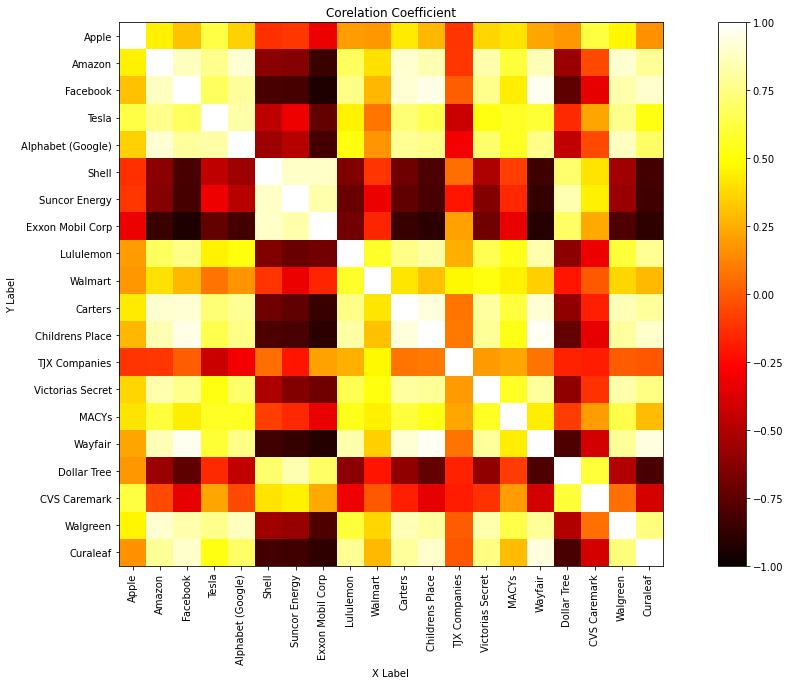

In [49]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
im = ax.imshow(df_combined.corr(), cmap="hot",vmin=-1, vmax=1)
ax.set_title('Corelation Coefficient')
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_xticks(range(len(df_combined.columns)))
ax.set_yticks(range(len(df_combined.columns)))
ax.set_xticklabels(df_combined.columns,rotation=90)
ax.set_yticklabels(df_combined.columns)
plt.colorbar(im)
plt.show()

In the above plot, the light yellow color represents high positive correlation, while the dark colors represent high negative correlation. We can clearly see some sets of companies (such as Apple, Amazon, Facebook, Tesla, and Google) are correlated with each other by looking at the bright square areas in the above image. As all these companies can be classified as high-tech companies and are often considered to be in the same industry, we can justify this correlation.

#Conclusion

In this post, we gathered stock price data for 20 companies from different industries, preprocessed the dataset to obtain a single dataframe, and then calculated the Pearson correlation coefficient among them. We then examined the correlation among all possible pairs and observed that some companies are more highly correlated with each other than others. In the next part, we will conduct further analysis of these correlations.